In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

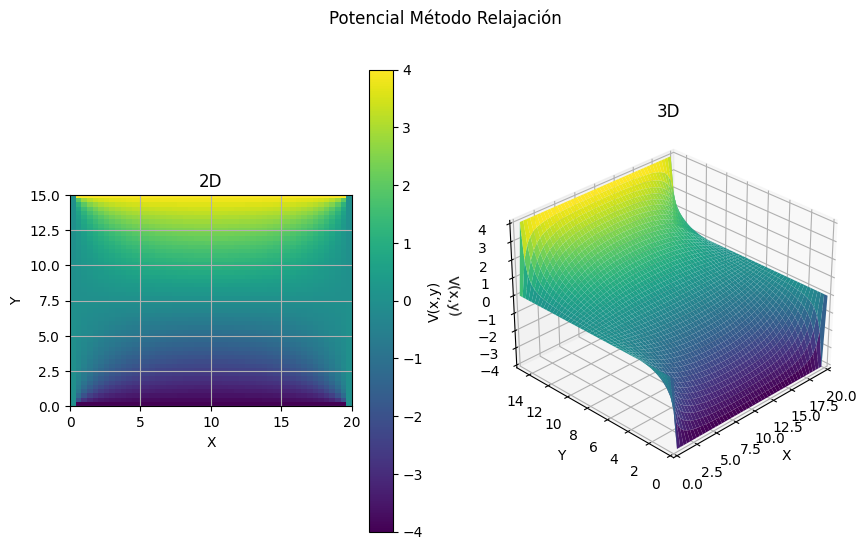

In [23]:
def laplace_discreta(N, M, V0, max_iter=1000,tol=1e-6): 
    """
    Resuelve la ecuación de Laplace en 2D mediante el método de relajación.

    Parámetros:
    - N (int): Número de puntos en la dirección x.
    - M (int): Número de puntos en la dirección y.
    - V0 (float): Valor del potencial en los bordes.
    - max_iter (int): Número máximo de iteraciones para alcanzar la convergencia (por defecto 1000).
    - tol (float): Tolerancia para la convergencia (por defecto 1e-6).

    Retorna:
    - V (array): Matriz con el potencial eléctrico en cada punto de la malla.
    """
    #Inicializa una matriz de ceros V de tamaño NxM para representar el potencial eléctrico en cada punto de la malla.
    V = np.zeros((N, M)) 
    #a = N*dxy
    #b = M*dxy
    # Condiciones de frontera
    V[0, :] = -V0  # Borde inferior, lo tomamos en la primera fila de la matriz, para todas las columnas
    V[-1, :] = V0  # Borde superior,lo tomamos en la última fila de la matriz, para todas las columnas, este lo nombre sin necesidad de llamar al valor b puesto que use -1 para llamar el ultimo valor de la matriz
    V[:, 0] = 0  # Borde izquierdo, lo tomamos en la primera columna de la matriz, para todas las filas
    V[:, -1] = 0  # Borde derecho, lo tomamos en la última columna de la matriz, para todas las filas, este lo nombre sin necesidad de llamar al valor a puesto que use -1 para llamar el ultimo valor de la matriz
    
    # Itera hasta alcanzar el número máximo de iteraciones
    for _ in range(max_iter):
        V_old = np.copy(V) # Copia del potencial anterior
        
        # Actualiza los valores internos de V a partir del método de relajación obtenido en el informe
        for i in range(1, N-1):
            for j in range(1, M-1):
                V[i, j] = (V_old[i+1, j] + V_old[i-1, j] + V_old[i, j+1] + V_old[i, j-1]) / 4
                
        # Calcula el cambio máximo en V
        delta_V = np.max(np.abs(V - V_old))
        
        # Comprueba la convergencia
        if delta_V < tol:
            print(f"Convergencia alcanzada después de {max_iter} iteraciones.")
            break
    
    
    return V #Retorna la matriz V que contiene el potencial eléctrico en cada punto de la malla.

# Parámetros de la red y condiciones de frontera
N = 50  # Número de puntos en la dirección x
M = 50  # Número de puntos en la dirección y
a = 20 # Tamaño del dominio en la dirección x
b = 15  # Tamaño del dominio en la dirección y
V0 = 4  # Valor de potencial en los bordes
#dxy = 0.1

# Calculamos la solución discreta para las condiciones de frontera dadas
V_discrete = laplace_discreta(N, M, V0)
# Graficar el potencial discreto
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(122, projection='3d')
ax1 = fig.add_subplot(121)
fig.suptitle("Potencial Método Relajación")
#Definir la cuadrícula
x = np.linspace(0, a, N)
y = np.linspace(0, b, M)
X, Y = np.meshgrid(x, y)
#Gráficar en 3D
ax.plot_surface(X, Y, V_discrete, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel("V(x,y)")
ax.set_title("3D")
ax.view_init(30,45)
ax.set_xlim(a, 0)
ax.set_ylim(b, 0)
#Gráficar en 2D
ax1.imshow(V_discrete, extent=[0, a, 0, b], origin='lower', cmap='viridis')
plt.colorbar(ax1.imshow(V_discrete, extent=[0, a, 0, b], origin='lower', cmap='viridis'), ax=ax1, label='V(x,y)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title("2D")
ax1.grid(True)

plt.savefig("MetodoRelajacion")

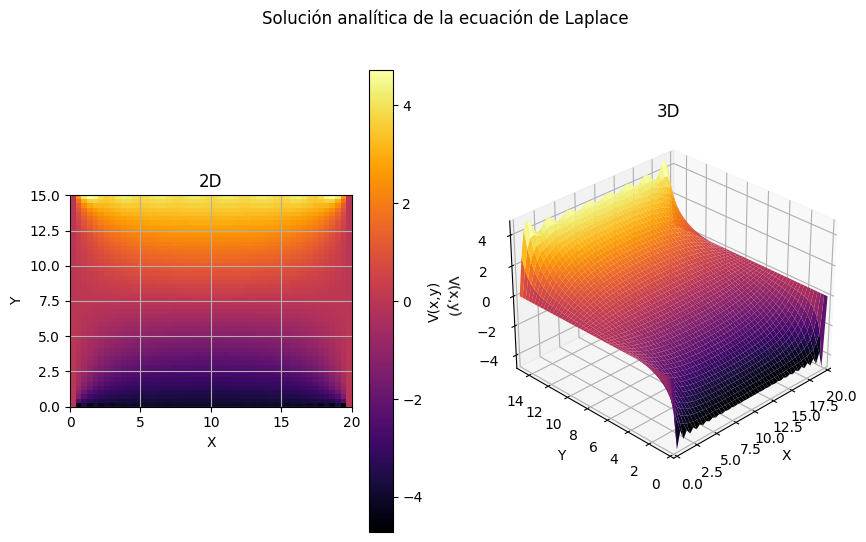

In [24]:
#Definimos la solución obtenida de forma analítica
def V_analytical(x, y, a, b, v0, N): 
    """
    Calcula el potencial eléctrico analítico en un punto (x, y) mediante una serie infinita.

    Parámetros:
    - x (array): Coordenadas en el eje x.
    - y (array): Coordenadas en el eje y.
    - a (float): Límite del dominio en la dirección x.
    - b (float): Límite del dominio en la dirección y.
    - v0 (float): Valor del potencial en los bordes.
    - N (int): Número de términos en la serie truncada.

    Retorna:
    - V (array): Matriz con el potencial eléctrico en cada punto de la cuadrícula (x, y).
    """
    V = np.zeros_like(x)
    for n in range(1, N+1):
        V += (((2 * v0 * ((-1)**n - 1) )/ (np.pi * n) )* np.sin(n * np.pi * x / a) *
              (np.cosh(n * np.pi * y / a ) -
               ((1 / np.sinh(n * np.pi * b / a )) + (1 / np.tanh(n * np.pi * b / a ))) *
               np.sinh(n * np.pi * y / a )))
    return V

# Definimos los parámetros para la función
a = 20.0
b = 15.0
v0 = 4.0
N = 50 

# Definir la cuadrícula
x = np.linspace(0, a, 50)
y = np.linspace(0, b, 50)
X, Y = np.meshgrid(x, y)

# Calcular el potencial analítico
V = V_analytical(X, Y, a, b, v0, N)

# Graficar el potencial 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(122, projection='3d')
ax1 = fig.add_subplot(121)
fig.suptitle("Solución analítica de la ecuación de Laplace")

#Graficar en 3d

ax.plot_surface(X, Y, V, cmap='inferno')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel("V(x,y)")
ax.set_title("3D")
ax.view_init(30,45)
ax.set_xlim(a, 0)
ax.set_ylim(b, 0)

#Graficar en 2D
ax1.imshow(V, extent=[0, a, 0, b], origin='lower', cmap='inferno')
plt.colorbar(ax1.imshow(V, extent=[0, a, 0, b], origin='lower', cmap='inferno'), ax=ax1, label='V(x,y)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title("2D")
ax1.grid(True)

plt.savefig("MetodoAnalitico")
